#1. 데이터 표현과 차원

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FbrE6MZ%2FbtqDiaE2a0Y%2FGfpVheNi2IqJBtiPUXxlT0%2Fimg.png' width=600 title='tensor'>

|종류|Scalar(0D tensor)|Vector(1D tensor)|Matrix(2D tensor)|3D Tensor|4D Tensor|
|:---:|:---|:---|:---|:---|:---|
|차원|0차원|1차원|2차원|3차원|4차원|
|특징|- 숫자|    - 숫자의 배열, 1개의 축(axis)을 가짐|    - 행과 열, 2개의 축을 가짐|    - (samples, width, height) 크기의 3D 텐서<br>- 사례: mnist 이미지|    - 딥러닝에서는 보통 0D~4D까지의 데이터를 다룸<br>- (samples, channels, width, height) 크기의 4D 텐서<br>- 사례: 컬러 이미지|
|표현| ( ) | (1, ) | (1, 10) | (1, 10, 100) | (1, 10, 100, 1000) |

- Numpy의 Scalars

https://numpy.org/doc/stable/reference/arrays.scalars.html

<img src="https://numpy.org/doc/stable/_images/dtype-hierarchy.png">

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# 0차원 Scalar 정의하기
f16 = np.float16("0.1")
type(f16)

numpy.float16

In [ ]:
f32 = np.float32(f16)
f64 = np.float64(f32)
print(f16, f32, f64)

0.1 0.099975586 0.0999755859375


In [ ]:
f16 == f32 == f64

True

In [ ]:
print(f16.shape, f32.shape, f64.shape)

() () ()


In [ ]:
# 1차원 Vector 정의하기
v = np.array()

In [ ]:
v[-1]

In [ ]:
v.dtype

In [ ]:
# 2차원 Matrix 정의하기
x = np.array([[1,2,3],[4,5,6]],np.int32)
type(x)

numpy.ndarray

In [ ]:
x.shape

(2, 3)

In [ ]:
x.dtype

dtype('int32')

In [ ]:
x[1,2]

6

In [ ]:
y = x[:,1]
y

array([2, 5], dtype=int32)

In [ ]:
# 3차원 3d tensor 정의하기
from tensorflow import keras
from keras.datasets import mnist

(train_imgs, train_labels), (test_imgs, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
train_imgs.shape

(60000, 28, 28)

In [ ]:
print(train_imgs[127])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   8 130 173 234   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   4 162 254 231  88   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0 107 254 254  84   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

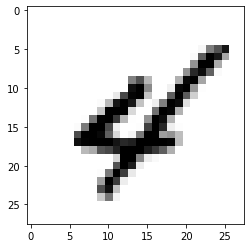

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_imgs[127],cmap = plt.cm.binary)

In [ ]:
# 4차원 4d tensor 정의하기
# 영상 출처: https://www.videvo.net/video/kittens-against-white-background/4775/
import cv2
cap = cv2.VideoCapture('./gatos_.mp4')

In [ ]:
frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

print(frameCount, frameWidth, frameHeight)

313 1920 1080


In [ ]:
path = './'
count = 0
every = 30

while(cap.isOpened() and count < frameCount//every):
    ret, image = cap.read()

    if(int(cap.get(1)) % 30 == 0):
        print('Saved frame number : ' + str(int(cap.get(1))))
        cv2.imwrite(path + "cat(%d).jpg" % count, image)
        print(path + "cat(%d).jpg" % count)
        count += 1

cap.release()

Saved frame number : 30
./cat(0).jpg
Saved frame number : 60
./cat(1).jpg
Saved frame number : 90
./cat(2).jpg
Saved frame number : 120
./cat(3).jpg
Saved frame number : 150
./cat(4).jpg
Saved frame number : 180
./cat(5).jpg
Saved frame number : 210
./cat(6).jpg
Saved frame number : 240
./cat(7).jpg
Saved frame number : 270
./cat(8).jpg
Saved frame number : 300
./cat(9).jpg


In [ ]:
# 한 프레임을 구성하는 color 이미지
img = cv2.imread('./cat(2).jpg')
img.shape

(1080, 1920, 3)

#2. EDA 실습

### 0. 라이브러리 import


In [ ]:
import numpy as np
import pandas as pd

### 1.데이터 로드 및 확인

- 데이터 출처: [전세계 라면 평점 정보](https://www.kaggle.com/datasets/residentmario/ramen-ratings)
- 칼럼
     - #Review : 리뷰글번호, 최근에 적혀있을 수록 숫자가 큼
     - Brand : 라면 회사명
     - Variety : 라면 제품명
     - Country : 라면 제조국
     - Style : 라면패키지(Cup/ Bowl/ Tray)
     - Stars : 5점 만점의 평점 데이터

- 오늘의 목표
    - 데이터의 결측값(비어있는 값)을 다양한 방법으로 처리할 수 있다!!
    - 다양한 시각화 방법을 이해할 수 있다!!
- 오늘의 질문
    - 어떤 패키징 스타일이 제일 많을까?
        - 추가질문: 패키징 스타일이 Stars에 영향을 받을까? 등
    - 라면으로 유명한 나라는 어디일까?
        - 추가질문: 라면브랜드가 많으면 평균 평점도 높을까? 등
    - 평가자들은 점수에 인색한 편일까?
    - 사람들이 선호하는 재료 또는 맛은 무엇일까?
    - 등등

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/My Drive/Colab Notebooks/.kaggle'
# '/content/drive/My Drive/Colab Notebooks' is the path where kaggle.json is present in the Google Drive

In [ ]:
# 데이터셋 다운로드
!kaggle datasets download -d residentmario/ramen-ratings

  0% 0.00/39.8k [00:00<?, ?B/s]
100% 39.8k/39.8k [00:00<00:00, 1.42MB/s]


In [ ]:
# zip파일 압축 해제 후 현재 디렉토리의 파일 리스트 보기
!unzip ramen-ratings.zip
!ls

Archive:  ramen-ratings.zip
  inflating: ramen-ratings.csv       
'cat(0).jpg'  'cat(3).jpg'  'cat(6).jpg'  'cat(9).jpg'	 ramen-ratings.csv
'cat(1).jpg'  'cat(4).jpg'  'cat(7).jpg'   drive	 ramen-ratings.zip
'cat(2).jpg'  'cat(5).jpg'  'cat(8).jpg'   gatos_.mp4	 sample_data


In [ ]:
# 원 데이터 로드
data = pd.read_csv('ramen-ratings.csv')

In [ ]:
# 데이터 head 출력
data.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [ ]:
# 데이터 shape 확인
data.shape

(2580, 7)

In [ ]:
# 데이터 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


In [ ]:
# 간단한 통계 정보 확인
data.describe(include='all')

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
count,2580.000000,2580,2580,2578,2580,2580,41
unique,NaN,355,2413,7,38,51,38
top,NaN,Nissin,Beef,Pack,Japan,4,\n
freq,NaN,381,7,1531,352,384,4
mean,1290.500000,NaN,NaN,NaN,NaN,NaN,NaN
std,744.926171,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,645.750000,NaN,NaN,NaN,NaN,NaN,NaN
50%,1290.500000,NaN,NaN,NaN,NaN,NaN,NaN
75%,1935.250000,NaN,NaN,NaN,NaN,NaN,NaN


### **2.missing data 확인 및 처리**

- isna() : None, numpy.NaN과 같은 NA value인지 검사하여 True/False 리턴
- notna() : NA value가 아닌지 검사하여 True/False 리턴




In [ ]:
# 결측값 확인을 위한 다른 방법
data.isna().sum()

Review #       0
Brand          0
Variety        0
Style          2
Country        0
Stars          0
Top Ten     2539
dtype: int64

#### Style 컬럼



```
#특정 조건으로 필터링할 경우
DataFrame명[조건]
DataFrame명[(조건1) & (조건2) & ...]
DataFrame명[DataFrame명['칼럼명'] == 값]

```



In [ ]:
# Style컬럼에서 비어있는 데이터 확인
data[data['Style'].isna()]

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
2152,428,Kamfen,E Menm Chicken,NaN,China,3.75,NaN
2442,138,Unif,100 Furong Shrimp,NaN,Taiwan,3,NaN


In [ ]:
data[data['Style'].isna()].index

Int64Index([2152, 2442], dtype='int64')

- 결측값(비어있는 값) 처리방법
    - 처리 방법 1)삭제 2)평균값 3)중앙값 4)최빈값 5)예측알고리즘 등으로 대체값 찾기
    - 어떤 방법으로 처리 할지는 데이터 성격과 상황에 따라 다를 수밖에 없음

In [ ]:
# 2152행- Kamfen사가 China에서 어떤 Style의 라면을 주로 파는지 파악하기
kamfen = data[data['Brand']=='Kamfen']
kamfen_ch = kamfen[kamfen['Country']=='China']
kamfen_ch['Style'].value_counts()

Pack    4
Tray    3
Name: Style, dtype: int64

In [ ]:
# 2442행- Unif사가 Taiwan에서 어떤 Style의 라면을 주로 파는지 파악
unif = data[data['Brand']=='Unif']
unif_tw = unif[unif['Country']=='Taiwan']
unif_tw['Style'].value_counts()

Bowl    7
Pack    3
Name: Style, dtype: int64

```
#데이터프레임 인덱싱하기(특정 데이터에 접근)
dataframe명[칼럼명] #특정 칼럼만
dataframe명.loc[행, 열]
dataframe명.iloc[행index, 열index]
```



- Kamfen 사는 Pack/ Tray의 개수가 비슷하고, Unif 사는 Bowl이 2배 이상으로 많은 것을 알 수 있습니다.
- 데이터 분석에는 분석자의 판단이 개입/적용되는 것이 보이시지요? 여기서는 간단히 최빈값으로 적용해보겠습니다!

In [ ]:
# 결측값을 최빈값으로 채우기
#data의 2152행의 Style 칼럼값을 'Pack' 으로 지정함
data.loc[2152,'Style'] = 'Pack'
#data의 2442행의 Style 칼럼값을 'Bowl' 로 지정함
data.loc[2442,'Style'] = 'Bowl'
#제대로 반영이 되었나 확인
data.isna().sum()

Review #       0
Brand          0
Variety        0
Style          0
Country        0
Stars          0
Top Ten     2539
dtype: int64

- 만약 결측데이터가 가치가 없다고 판단되면 삭제하는 것도 방법



```
# dropna함수 사용
# Style에서 결측데이터를 가지고 있는 행을 삭제
# dropna시 subset을 명시하지 않으면 DataFrame 전체(column, row)에 대해 삭제를 진행, inplace는 원본에 반영여부를 묻는 것
data.dropna(subset=['Style'], inplace= True)
# 잘 반영되었나 확인
data['Style'].isna().sum()
```



#### Stars 컬럼
image.png
- 현재 Stars는 문자형태의 값이 저장되어있으므로 숫자로 변경하고, 변경이 불가한  값이 있는지 확인할 필요가 있음!

In [ ]:
for s in data['Stars']:
    #Stars의 값을 실수(float)로 타입변경
    s = float(s)

ValueError: ignored

In [ ]:
#try-except 구문: try에 적힌 명령을 시도하고, 오류가 나면 except에 따름
for i, s in enumerate(data['Stars']):
  try:#Stars의 값을 실수(float)로 타입변경을 시도!
        s = float(s)

  except: #try하여 오류가 날 경우 실행하는 코드
        print(i,s)


32 Unrated
122 Unrated
993 Unrated


In [ ]:
#Stars값이 Unrated인것만 추출
data[data['Stars']=='Unrated']


,Review #,Brand,Variety,Style,Country,Stars,Top Ten
32,2548,Ottogi,Plain Instant Noodle No Soup Included,Pack,South Korea,Unrated,NaN
122,2458,Samyang Foods,Sari Ramen,Pack,South Korea,Unrated,NaN
993,1587,Mi E-Zee,Plain Noodles,Pack,Malaysia,Unrated,NaN


Variety를 보고 해당 데이터들의 공통점을 찾아보세요!

그럼 Stars값을 어떤 값으로 대체하면 될까요?

In [ ]:
unratedlist = data[data['Stars']=='Unrated'].index

In [ ]:
data.loc[unratedlist, 'Stars'] = 0
# 특정값을 대체할 때 replace도 자주 사용함. 형태: DataFrame명[칼럼명].replace({변경전:변경후}, inplace=True)

In [ ]:
#반영결과 확인
data[data['Stars']=='Unrated']['Stars'].sum()

0

앞서 Stars칼럼은 object 타입(문자열)임을 확인했으므로 숫자 타입으로 변경해봅시다


```
pd.to_numeric(숫자로 변경할 대상, errors='ignore/raise/coerce') #숫자 변경이 안될 경우 원본을 그대로 반환/에러일으킴/NaN으로 변경
DataFrame명.astype(변환할 문자형)
```



In [ ]:
print('변경 전', data['Stars'].dtypes)
data['Stars'] = pd.to_numeric(data['Stars'])
print('변경 후', data['Stars'].dtypes)

변경 전 object
변경 후 float64


In [ ]:
data['Stars'].describe()

count    2580.000000
mean        3.650426
std         1.022358
min         0.000000
25%         3.250000
50%         3.750000
75%         4.250000
max         5.000000
Name: Stars, dtype: float64

### 3.데이터 시각화
- 데이터 시각화를 통해 데이터에 대한 통찰을 얻는다.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Style별 비율

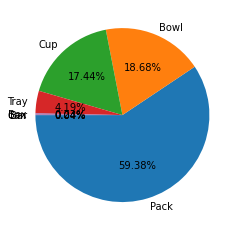

In [ ]:
style_count = data['Style'].value_counts()
labels = style_count.index

plt.figure()
plt.pie(style_count, labels=labels, autopct='%.2f%%', startangle=180)
plt.show()

#### 나라별 브랜드 개수

In [ ]:
df_cnt_brand = pd.DataFrame(data.groupby('Country')['Brand'].unique())
df_cnt_brand

,Brand
Country,
Australia,"[Fantastic, Suimin, Singa-Me, Maggi, Trident]"
Bangladesh,"[Pran, MAMA, Mama]"
Brazil,[Nissin]
Cambodia,"[MAMA, Mama]"
Canada,"[Great Value, Azami, Western Family, No Name, ..."
China,"[Sichuan Guangyou, Uni-President, Nissin, Mast..."
Colombia,[Nissin]
Dubai,[Golden Mie]
Estonia,[Baltix]


In [ ]:
df_cnt_brand['Amount of Brands'] = df_cnt_brand['Brand'].map(lambda x: len(x))
df_cnt_brand.head()

,Brand,Amount of Brands
Country,,
Australia,"[Fantastic, Suimin, Singa-Me, Maggi, Trident]",5
Bangladesh,"[Pran, MAMA, Mama]",3
Brazil,[Nissin],1
Cambodia,"[MAMA, Mama]",2
Canada,"[Great Value, Azami, Western Family, No Name, ...",9


In [ ]:
df_cnt_brand = df_cnt_brand.sort_values('Amount of Brands', ascending=False)
df_cnt_brand = df_cnt_brand.reset_index()
df_cnt_brand = df_cnt_brand.drop('Brand',axis=1)
df_cnt_brand.head()

,Country,Amount of Brands
0,Japan,58
1,USA,49
2,Taiwan,47
3,South Korea,35
4,China,33


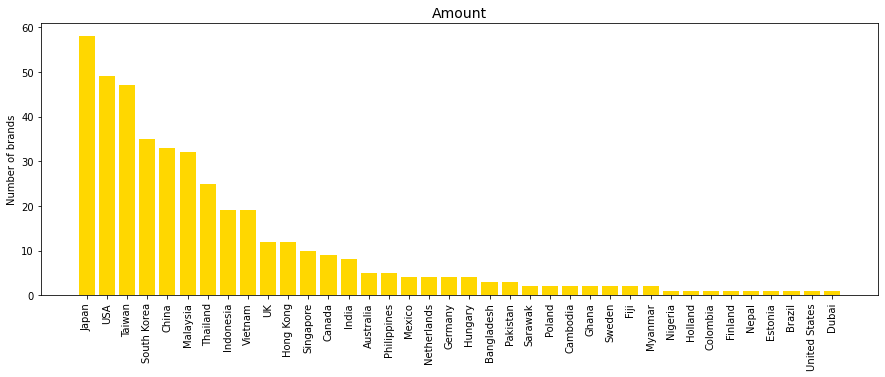

In [ ]:
#f, ax = plt.subplots(figsize=(15,5))
plt.figure(figsize=(15, 5))
plt.bar('Country', 'Amount of Brands', data=df_cnt_brand, color='gold')
plt.title('Amount', fontsize=14)
plt.ylabel('Number of brands')
plt.xticks(rotation=90)
plt.show()

#### Stars 분포

- Seaborn의 distplot 명령은 러그와 커널 밀도 표시 기능이 있어서 Matplotlib의 hist 명령보다 많이 사용된다.

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Stars', ylabel='Density'>

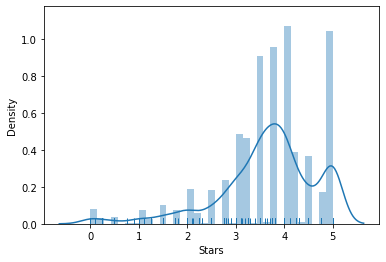

In [ ]:
sns.distplot(data['Stars'], rug=True)

- Stars 컬럼

In [ ]:
#값의 중앙값, 평균을 통해 유추하기
print(np.median(data['Stars']), np.mean(data['Stars']))

3.75 3.6504263565891466


- 중앙값은 값을 나열했을 때, 정중앙에 해당하는 수임
- 평균과 중앙값을 보고 바로 분포를 떠올리기 쉽지 않기때문에 시각화 필요

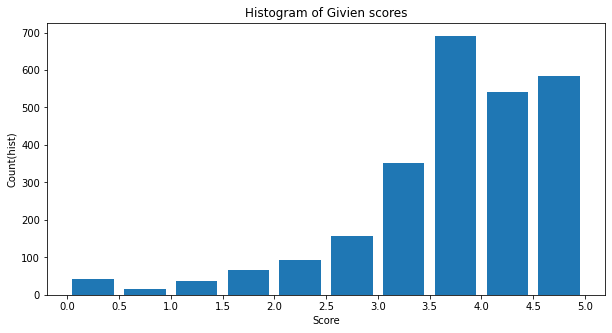

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.xticks(np.arange(0, 5.5, step=0.5))
plt.hist(data['Stars'], rwidth=0.8)
plt.title('Histogram of Givien scores')
plt.xlabel('Score')
plt.ylabel('Count(hist)')
plt.show()

- 0점을 최저, 5점을 최고점으로 보았을 때 대체로 3.0이상을 획득하였으며 이에따라 평균(3.75), 중간값(3.65)이 높은 편임

#### Style별 Stars 분포

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Style', ylabel='Stars'>

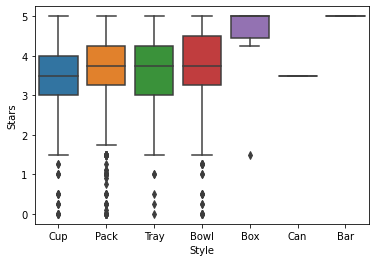

In [ ]:
sns.boxplot(data['Style'], data['Stars'])

이 외, 새로운 질문을 생성하고 이에 대한 답을 찾아나가 봅시다!